In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import quandl
from datetime import datetime
from math import ceil

In [2]:
%matplotlib inline

In [3]:
DATA_DIR = 'DATA'
DATA_PATH = os.path.join('..',DATA_DIR)

In [4]:
# Add your Quandl API key in
# ../settings/settings.py - API_KEY

os.chdir('../settings/')

from settings import API_KEY

In [5]:
quandl.ApiConfig.api_key = API_KEY
    

In [6]:
def quandl_data(quandl_id):
    '''
        Gets data from Quandl API.
    '''
    now = datetime.now()
    file = '{}-{}-{}-{}.pkl'.format(quandl_id.replace('/','-'), 
                                    now.year, now.month, now.day)
    path = os.path.join(DATA_PATH, file)
    try:
        f = open(path, 'rb')
        df = pickle.load(f)
    except (IOError,OSError):
        df = quandl.get(quandl_id, returns='pandas')
        # pickles df so it doesnt have to download
        # data from the same day again. 
        df.to_pickle(path)
    return df

In [7]:
def quandl_format(market, curr):
    '''
        returns BCHARTS/{MARKET}{CURRENCY}
    '''
    return "BCHARTS/{0}{1}".format(market.upper(), curr.upper())

In [8]:
markets = ["Kraken", "foxbit", "Bitstamp", "itBit"]
currs = ["USD", "BRL", "USD", "USD"]

data = {market:quandl_format(market, curr) for market, curr in zip(markets, currs)}

In [9]:
data

{'Bitstamp': 'BCHARTS/BITSTAMPUSD',
 'Kraken': 'BCHARTS/KRAKENUSD',
 'foxbit': 'BCHARTS/FOXBITBRL',
 'itBit': 'BCHARTS/ITBITUSD'}

In [10]:
btc_price = quandl_data(data['Kraken'])

In [11]:
btc_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1392 entries, 2014-01-07 to 2017-10-29
Data columns (total 7 columns):
Open                 1392 non-null float64
High                 1392 non-null float64
Low                  1392 non-null float64
Close                1392 non-null float64
Volume (BTC)         1392 non-null float64
Volume (Currency)    1392 non-null float64
Weighted Price       1392 non-null float64
dtypes: float64(7)
memory usage: 87.0 KB


In [12]:
btc_price.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1.392000e+03,1392.000000
mean,870.105813,897.007210,843.910533,873.938248,1450.167907,3.210805e+06,870.806831
std,1081.968753,1120.742578,1045.424346,1091.231030,2594.295158,7.938628e+06,1083.038564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,311.471378,319.734800,294.173137,309.600725,12.303753,4.905337e+03,311.969024
50%,509.547045,529.959715,490.527890,516.299245,113.549608,3.448851e+04,508.632920
75%,778.875000,790.360000,771.929250,779.040000,1628.786168,1.156881e+06,781.026998
max,6039.800000,6209.900000,5920.900000,6165.900000,21846.766955,7.435428e+07,6071.996250


In [13]:
btc_price.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [14]:
def plot_(df, curr="USD"):
    ax = df[['Close']].plot(title='Close Price', figsize=(16,8))
    
    n_ticks = ceil(btc_price['Close'].max()/1000) + 1
    y_ticks = [y*1000 for y in range(n_ticks)]

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(['0'] + ['{}k'.format(y//1000) for y in y_ticks[1:]])
    ax.set(ylabel=curr)
    
    return ax

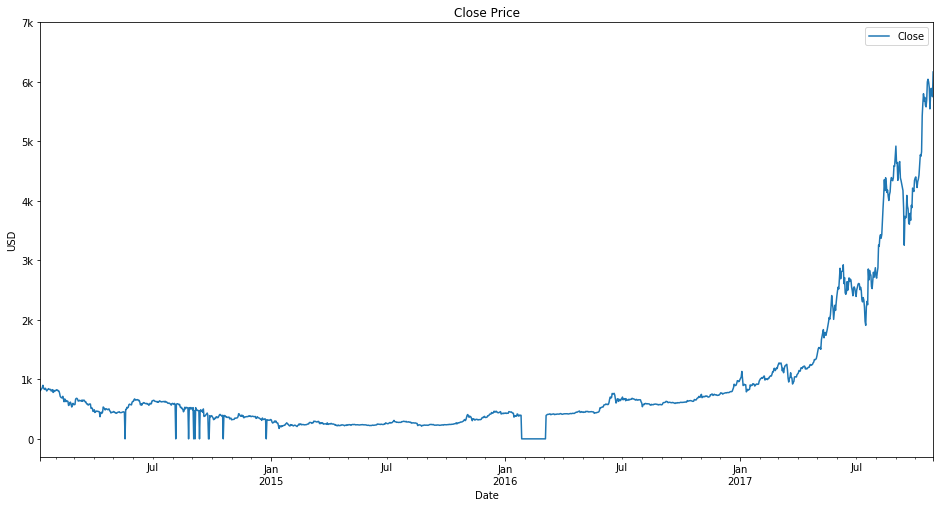

In [15]:
plot_(btc_price)

# Plotting Bollinger Bands

In [16]:
def plot_boll_band(df, k=2, period=20):
    fig, ax = plt.subplots(figsize=(16,8))
    
    df_period_mean = df['Close'].rolling(window=period).mean()
    
    df_upper = df_period_mean + k*(df['Close'].rolling(period).std())
    
    df_lower = df_period_mean - k*(df['Close'].rolling(period).std())
    
    df['Close'].plot(ax=ax)
    df_period_mean.plot(ax=ax)
    df_upper.plot(ax=ax)
    df_lower.plot(ax=ax)
    
    return ax

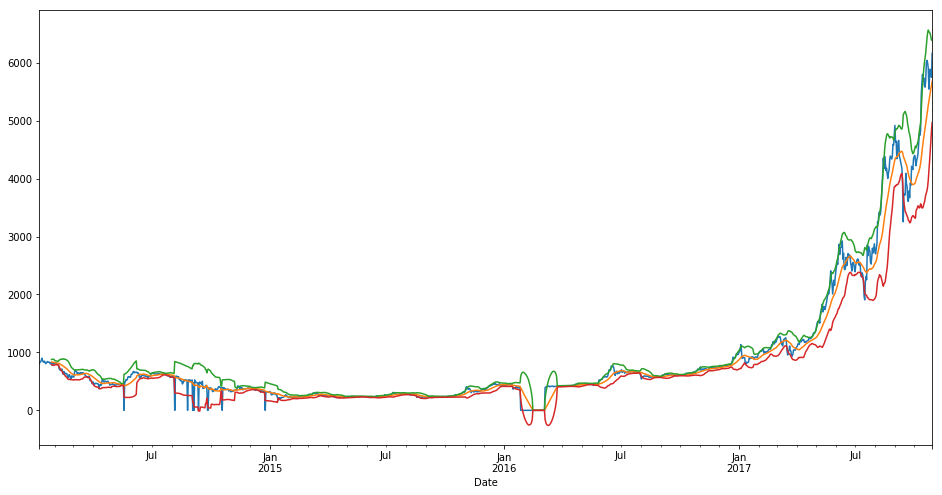

In [17]:
plot_boll_band(btc_price)

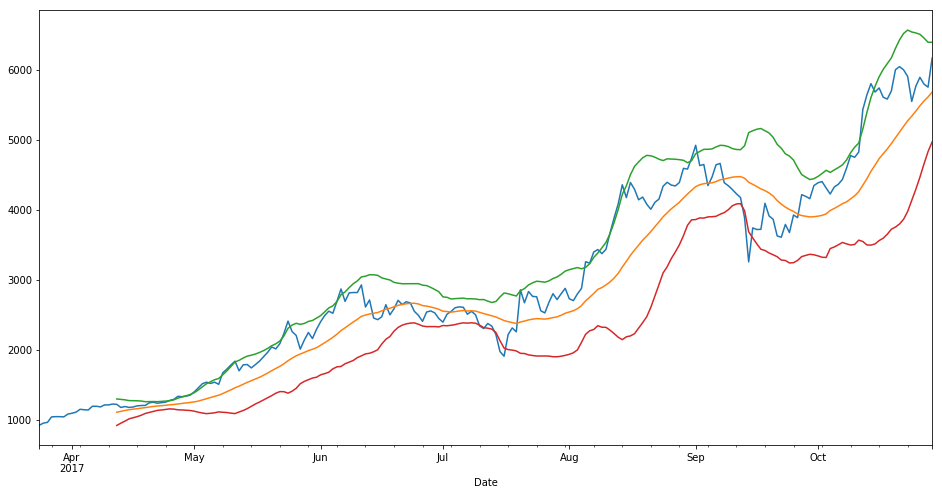

In [18]:
# Check only last 200 days of time series
plot_boll_band(btc_price.tail(220))